In [1]:
import pandas as pd

from src import vehicular_data_columns, subject_data_columns, neurophysiological_data_columns, video_data_analysis_columns
from src.preprocess import remove_invalid_data

In [5]:
DATA_PATH = "../data/"

feature_track_path = DATA_PATH + "Feature_Track.xlsx"
feature_simulation_path = DATA_PATH + "Feature_Simulation.xlsx"

In [6]:
# Reading the datasets
feature_track_df = pd.read_excel(feature_track_path)
feature_simulation_df = pd.read_excel(feature_simulation_path)

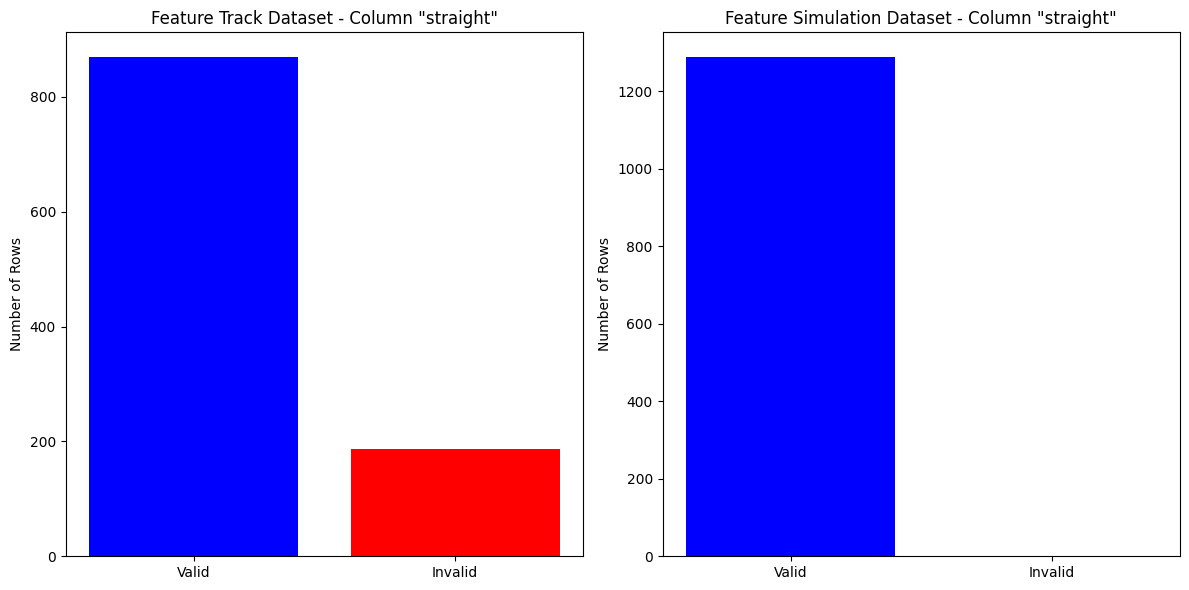

In [8]:
import matplotlib.pyplot as plt

# Checking for invalid values in 'straight' column for both datasets
# Valid values are either 0 or 1
invalid_straight_track = feature_track_df[~feature_track_df['straight'].isin([0, 1])]
invalid_straight_simulation = feature_simulation_df[~feature_simulation_df['straight'].isin([0, 1])]

# Counting valid and invalid rows for 'straight' column in both datasets
valid_invalid_counts_track = {'Valid': len(feature_track_df) - len(invalid_straight_track), 'Invalid': len(invalid_straight_track)}
valid_invalid_counts_simulation = {'Valid': len(feature_simulation_df) - len(invalid_straight_simulation), 'Invalid': len(invalid_straight_simulation)}

# Plotting the results in a bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(valid_invalid_counts_track.keys(), valid_invalid_counts_track.values(), color=['blue', 'red'])
ax[0].set_title('Feature Track Dataset - Column "straight"')
ax[0].set_ylabel('Number of Rows')

ax[1].bar(valid_invalid_counts_simulation.keys(), valid_invalid_counts_simulation.values(), color=['blue', 'red'])
ax[1].set_title('Feature Simulation Dataset - Column "straight"')
ax[1].set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()

In [9]:
# Function to calculate valid and invalid rows for each column in a DataFrame
def calculate_valid_invalid_rows(df):
    valid_invalid_counts = {}
    for column in df.columns:
        valid_count = df[column].notna().sum()
        invalid_count = df[column].isna().sum()
        if invalid_count > 0:  # Only consider columns with invalid (NaN) values
            valid_invalid_counts[column] = {'Valid': valid_count, 'Invalid': invalid_count}
    return valid_invalid_counts

# Calculate valid and invalid rows for both datasets
valid_invalid_counts_track = calculate_valid_invalid_rows(feature_track_df)
valid_invalid_counts_simulation = calculate_valid_invalid_rows(feature_simulation_df)

# Display the results
valid_invalid_counts_track, valid_invalid_counts_simulation

({'max_speed': {'Valid': 1012, 'Invalid': 44},
  'avg_speed': {'Valid': 1012, 'Invalid': 44},
  'std_speed': {'Valid': 1012, 'Invalid': 44},
  'hr': {'Valid': 711, 'Invalid': 345},
  'hrv_lf': {'Valid': 711, 'Invalid': 345},
  'hrv_hf': {'Valid': 711, 'Invalid': 345},
  'hrv_lfhf_ratio': {'Valid': 711, 'Invalid': 345},
  'gsr_tonic': {'Valid': 816, 'Invalid': 240},
  'gsr_phasic': {'Valid': 816, 'Invalid': 240},
  'gsr_peaks': {'Valid': 816, 'Invalid': 240},
  'EBRmean': {'Valid': 717, 'Invalid': 339},
  'BDmean': {'Valid': 715, 'Invalid': 341},
  'ThetaFrontal': {'Valid': 809, 'Invalid': 247},
  'ThetaParietal': {'Valid': 809, 'Invalid': 247},
  'AlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'AlphaParietal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'BetaFrontal': {'Valid

In [10]:
# Example usage
cleaned_feature_track = remove_invalid_data(
    feature_track_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

cleaned_feature_simulation = remove_invalid_data(
    feature_simulation_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

In [12]:
cleaned_feature_track = cleaned_feature_track.drop(columns=["Unnamed: 0"])
cleaned_feature_track

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
1,0AC2A4,1,27,1,0,1,0,1,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,0AC2A4,1,33,1,0,0,1,1,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,0AC2A4,1,43,1,1,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,0AC2A4,1,58,1,1,0,0,0,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762
5,0AC2A4,1,100,1,0,0,0,0,1,0,...,0.25684,0.14480,0.14691,0.13539,0.03894,0.02784,0.04989,0.04311,0.03223,0.01851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,8924EA,7,34,0,0,1,1,0,0,0,...,0.12229,0.09790,0.09598,0.06669,0.01560,0.01280,0.02259,0.01996,0.01113,0.00853
1048,8924EA,7,39,1,0,0,0,0,0,0,...,0.07144,0.06057,0.04700,0.04750,0.01564,0.01582,0.02689,0.02627,0.00868,0.00944
1049,8924EA,7,57,1,0,0,0,0,1,0,...,0.08088,0.07371,0.04604,0.04563,0.01604,0.01400,0.02659,0.02390,0.00948,0.00785
1050,8924EA,7,99,0,0,0,0,1,0,0,...,0.10211,0.09497,0.04877,0.06143,0.01402,0.01226,0.02569,0.02228,0.00680,0.00593


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
one_hot_encoded = pd.get_dummies(cleaned_feature_track['subject'], prefix='car')
cleaned_feature_track = pd.concat([cleaned_feature_track, one_hot_encoded], axis=1).drop('subject', axis=1)

In [17]:
# Assuming all features in cleaned_feature_track are relevant
df_behavior = cleaned_feature_track.copy()

# Scale the features
scaler = StandardScaler()
df_behavior_scaled = scaler.fit_transform(df_behavior)


In [18]:
# Define the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model on the scaled data
kmeans.fit(df_behavior_scaled)

# Get the cluster labels
clusters = kmeans.labels_


In [19]:
# Add the cluster labels to the original DataFrame
cleaned_feature_track['Cluster'] = clusters

In [21]:
set(clusters)

{0, 1, 2, 3, 4}

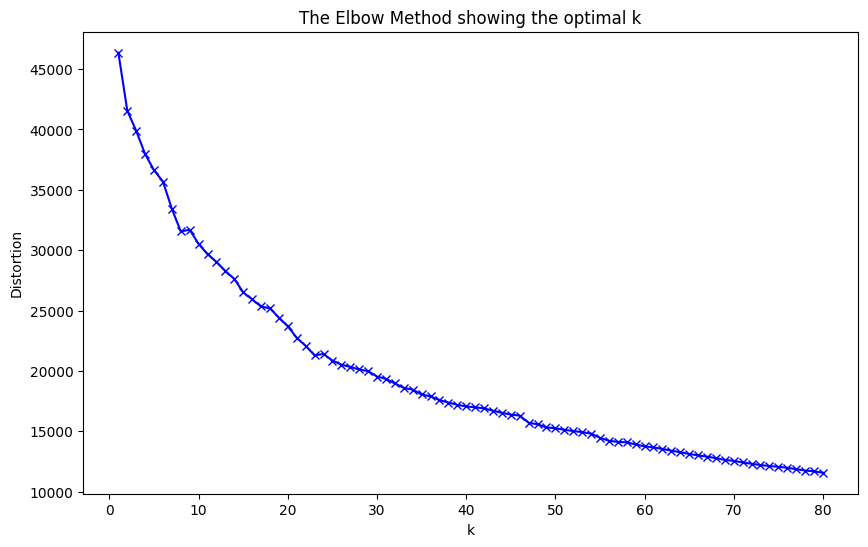

In [26]:
# Calculate distortion for a range of number of cluster
distortions = []
K = range(1, 81)  # Adjust the range based on your dataset size and computational considerations
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_behavior_scaled)
    distortions.append(kmeanModel.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [28]:
# Assuming all features in cleaned_feature_track are relevant
# If car_code is included, make sure it's appropriately transformed
features = cleaned_feature_track.copy()

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [29]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These are default values; you might need to adjust them
clusters = dbscan.fit_predict(features_scaled)

# Add the cluster labels to your DataFrame
cleaned_feature_track['Cluster'] = clusters


In [30]:
# Check the number of clusters and points labeled as noise
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 0
Estimated number of noise points: 539
